In [2]:
# Preamble  here, add paths and import relevant modules
import os
import sys
sys.path.append('/'.join(os.getcwd().split('/')[:-1]))
import util
reload(util)
import numpy as np 
import sklearn
from sklearn import datasets
from scipy.sparse.linalg import eigsh
from numpy.random import permutation
% matplotlib inline
import matplotlib.pyplot as plt# Preamble  here, add paths and import relevant modules
import os
import sys
sys.path.append('/'.join(os.getcwd().split('/')[:-1]))
import util
reload(util)
import numpy as np 
import sklearn
from sklearn import datasets
from scipy.sparse.linalg import eigsh
from numpy.random import permutation
% matplotlib inline
import matplotlib.pyplot as plt

# #Tutorial 1 --- Intro to Graph Laplacian Algorithms

Graphs Laplacians have been widely used in both clustering and image processing. In clustering, the most popular algorithm used is spectral clustering, which first does a spectral embedding of the original data, and then applies k-means to the transform domain. In image processing, the Graph Laplacian is mainly used as a non-local smoothing term $<x^T,Lx>$ to boost the performance in images with lots of self-similarities(e.g., texture rich images).

Recently, several new algorithms using the graph Laplacian has been proposed by Prof. Andrea Bertozzi and her collaborators. Unlike methods before, these algorithms aims to approximately minimize the full Graph-Cut energy, and have showned to outperform the standard algorithms mentioned above. These methods also have their origins in the area of PDE's and material science, and can be seen as an elegant connection between the world of machine learning and differential equation.

I have recently implemented a barebone version of her algorithms. 


In [12]:
# # graph construction test(don't delete)
# test_graph = util.BuildGraph(affinity = 'rbf', gamma = 1,Neig = 10,Eig_solver = 'arpack')
# test_graph.build_Laplacian(x[:,:,0])   

test_graph = util.BuildGraph(affinity = 'rbf', gamma = 2,Neig = 10,Eig_solver = 'nystrom', num_nystrom = 30)
test_graph.build_Laplacian(x[:,:,0])  


# util.BuildGraph(affinity = 'rbf',neighbor_type = 'knearest',n_neighbor = 50, Neig = 10, Eig_solver = 'arpack')
# test_graph.build_Laplacian(x[:,:,0]) 

data = x[:,:,0]
v = test_graph.laplacian_matrix_['V']
plt.scatter(data[:,0], data[:,1], c = v[:,1])
plt.show()




IndexError: too many indices for array

In [15]:
# test building a graph Laplacian classifier
import graph_cluster
reload(graph_cluster)
from graph_cluster import LaplacianClustering

n_samples = 800
x = np.zeros([n_samples,2])
y = np.zeros([n_samples])
x,y = sklearn.datasets.make_moons(n_samples=n_samples, noise=0.02+.03*(2),shuffle = False)
clf = LaplacianClustering(scheme_type = 'MBO_fidelity',dt = 1,eps = 2)
y[y==1] = 3
y[y == 0] = 4 #mess up the ground truth
y[2] = 5
clf.load_data(raw_data = x,ground_truth=y)
clf.generate_random_fidelity(percent = .05)
clf.build_graph(Eig_solver = 'arpack' , affinity = 'rbf', Laplacian_type = 'u',gamma = 5, Neig = 50);
clf.fit_predict()
plt.scatter(data[:,0], data[:,1], c = clf.labels_)
plt.show()
print(clf.compute_error_rate())
# clf.set_parameters(scheme_type = 'MBO_fidelity', dt = 1)
# clf.fit_predict()
# plt.scatter(data[:,0], data[:,1], c = clf.labels_)
# plt.show()
# print(clf.compute_error_rate())

u_init not provided. Generating random initial condition.
Warning, fidelity strength eta not supplied. Using default value 1


TypeError: 'module' object has no attribute '__getitem__'

u_init not provided. Generating random initial condition.


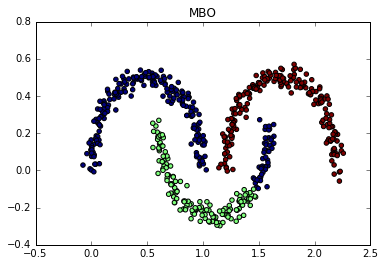

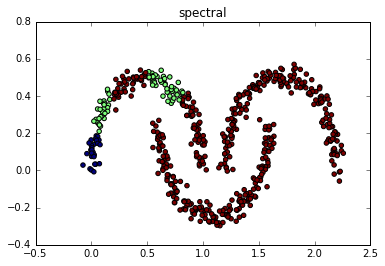

In [26]:
# test spectral clustering multiclass
from sklearn.cluster import KMeans
import data
import graph_cluster
reload(graph_cluster)
x,y = data.three_moons()
clf = LaplacianClustering(scheme_type = 'MBO_fidelity',dt = .8,eta = 1,inner_step_count = 10)
clf.load_data(raw_data = x,ground_truth=y)
clf.generate_random_fidelity(percent = .04)
clf.build_graph(Eig_solver = 'arpack' , affinity = 'z-p', neighbor_type = 'knearest',
                n_neighbors = 15,Laplacian_type = 'n',gamma = 1, Neig = 20);
clf.fit_predict()
plt.scatter(x[:,0], x[:,1], c = clf.labels_)
plt.title('MBO')
plt.show()

clf.set_parameters(scheme_type = 'spectral_clustering')
clf.fit_predict()
plt.scatter(x[:,0], x[:,1], c = clf.labels_)
plt.title('spectral')
plt.show()

In [5]:
import graph_cluster
import data
reload(graph_cluster)
x,y = data.three_moons()
clf = LaplacianClustering(scheme_type = 'MBO_fidelity',dt = .8,eta = 1,inner_step_count = 10)
clf.load_data(raw_data = x, ground_truth=y)
clf.build_graph(Eig_solver = 'arpack' , affinity = 'rbf', neighbor_type = 'knearest',
                n_neighbors = 15,Laplacian_type = 'n',gamma = 1, Neig = 5)
clf.fit_predict()
plt.scatter(x[:,0], x[:,1], c = clf.labels_)
plt.show()
print(clf.compute_error_rate())

NameError: name 'LaplacianClustering' is not defined

u_init not provided. Generating random initial condition.


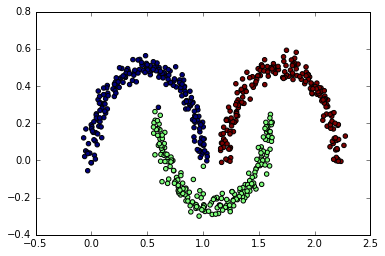

0.00333333333333


In [115]:
import graph_cluster
from graph_cluster import LaplacianClustering
import data
reload(graph_cluster)
x,y = data.three_moons()
clf = LaplacianClustering(scheme_type = 'MBO_modularity',dt = .2,gamma = .8,inner_step_count = 5)
clf.load_data(raw_data = x, ground_truth=y)
clf.build_graph(Eig_solver = 'arpack' , affinity = 'rbf', neighbor_type = 'knearest',
                n_neighbors = 15,Laplacian_type = 'n',gamma = 2, Neig = 5)
clf.fit_predict()
plt.scatter(x[:,0], x[:,1], c = clf.labels_)
plt.show()
print(clf.compute_error_rate())

In [35]:
clf.data.raw_data.shape[0]

600

In [392]:
clf.scheme_type

'MBO_modularity'

In [229]:
a = None
if True:
    a = 2
a

2